In [2]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

data_dict = pickle.load(open('./data/data_numeros.pickle', 'rb'))

data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

unique_labels = sorted(list(set(labels)))
label_to_num = {label: i for i, label in enumerate(unique_labels)}
num_labels = np.array([label_to_num[label] for label in labels])

X_train, X_test, y_train, y_test = train_test_split(data, num_labels, test_size=0.2, random_state=42)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
print(label_to_num)
print(num_labels)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
[0 0 0 ... 9 9 9]


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(data.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_to_num), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), batch_size=32)

model.save('./model/model_numeros2.keras')

c:\Users\CARLOS VALDERA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2122 - loss: 2.1549 - val_accuracy: 0.8519 - val_loss: 1.2095
Epoch 2/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6062 - loss: 1.2173 - val_accuracy: 0.9287 - val_loss: 0.4920
Epoch 3/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7694 - loss: 0.6892 - val_accuracy: 0.9644 - val_loss: 0.2650
Epoch 4/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8502 - loss: 0.4627 - val_accuracy: 0.9744 - val_loss: 0.1654
Epoch 5/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8921 - loss: 0.3425 - val_accuracy: 0.9812 - val_loss: 0.1115
Epoch 6/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9160 - loss: 0.2698 - val_accuracy: 0.9831 - val_loss: 0.0826
Epoch 7/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9312 - loss: 0.2283 - val_accuracy: 0.9831 - val_loss: 0.0724
Epoch 8/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9397 - loss: 0.2019 - val_accuracy: 0.

In [4]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 6.0319e-04
Loss: 0.000884965353179723, Accuracy: 1.0


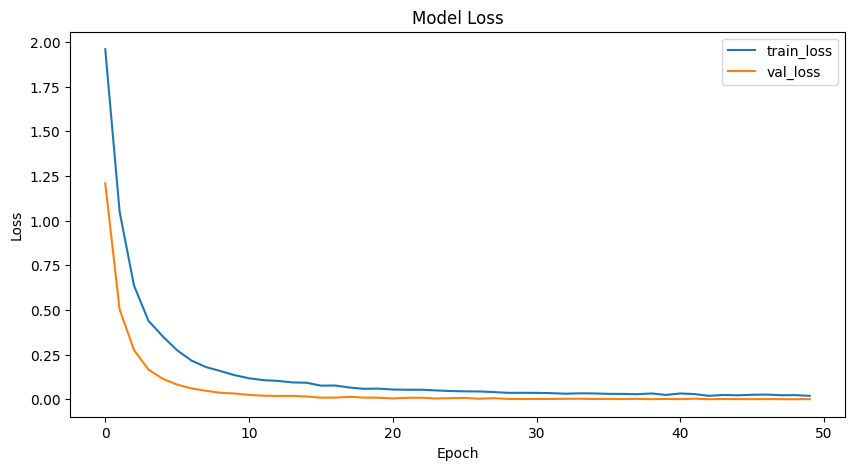

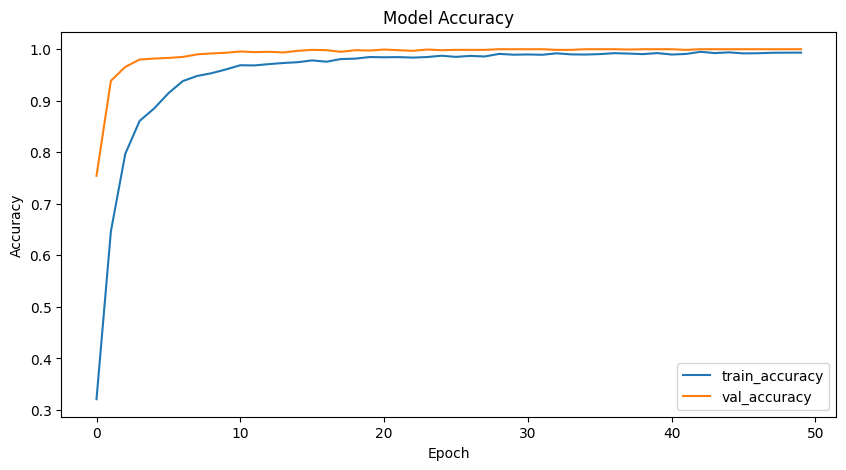

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
